#### Task 1 importing all the necessary libs

In [91]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import calendar
from itertools import combinations
from collections import Counter

#### Merging all the data csv files of 12 months into one dataframe

In [12]:
files = [file for file in os.listdir('./Sales_Data')]

all_months_df = pd.DataFrame()

for file in files:
    sales_df = pd.read_csv("./Sales_Data/"+file)
    all_months_df = pd.concat([all_months_df, sales_df])

# all_months_df.head(5)

all_months_df.to_csv("all_months_dataframe.csv", index=False)

#### Read in the updated dataframe

In [13]:
all_data = pd.read_csv("all_months_dataframe.csv")
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Data Cleaning 

##### Drop NAN!

In [16]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

#drop 
all_data = all_data.dropna(how="all")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


##### Drop OR!

In [20]:
or_df = all_data[all_data['Order Date'].str[0:2] == 'Or']
or_df.head()

#drop
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


##### Convert the columns to the correct type 

In [64]:
#convert the string type of Quantity ordered and price each to int and float
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int32')
all_data['Price Each'] = all_data['Price Each'].astype('float')

# convert the string of order date to data_time type
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA"
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"


#### Augment the dataframe with some additional columns

##### Add the month column

In [21]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


##### Add the sales column 

In [46]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


##### Add the city column

In [57]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x : get_city(x) + ", " + get_state(x))
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"


### What was the best month for the sales ? How much was earned that month ?

In [34]:
month_sales_result = all_data.groupby('Month').sum(numeric_only=True)
month_sales_result.head(12)

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


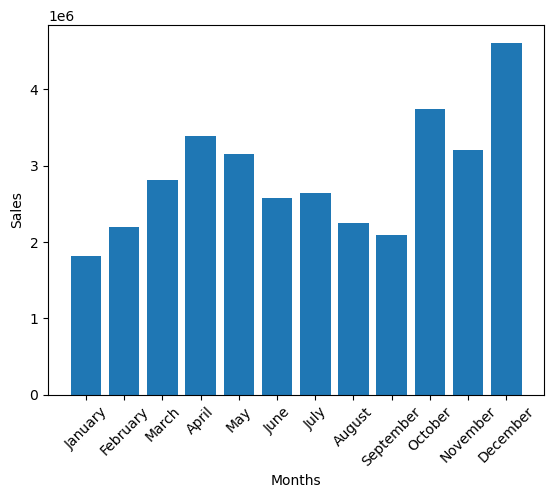

In [45]:
month = range(1,13)
month_names = [calendar.month_name[i] for i in month]
plt.bar(month_names, month_sales_result['Sales'])
plt.xticks(rotation=45)
plt.ylabel("Sales")
plt.xlabel("Months")
plt.show()

### What city had the highest number of sales ? 

In [58]:
city_sales_result = all_data.groupby('City').sum(numeric_only=True)
city_sales_result

,Quantity Ordered,Price Each,Month,Sales
City,,,,
"Atlanta, GA",16602,2779908.20,104794,2795498.58
"Austin, TX",11153,1809873.61,69829,1819581.75
"Boston, MA",22528,3637409.77,141112,3661642.01
"Dallas, TX",16730,2752627.82,104620,2767975.40
"Los Angeles, CA",33289,5421435.23,208325,5452570.80
"New York City, NY",27932,4635370.83,175741,4664317.43
"Portland, ME",2750,447189.25,17144,449758.27
"Portland, OR",11303,1860558.22,70621,1870732.34
"San Francisco, CA",50239,8211461.74,315520,8262203.91


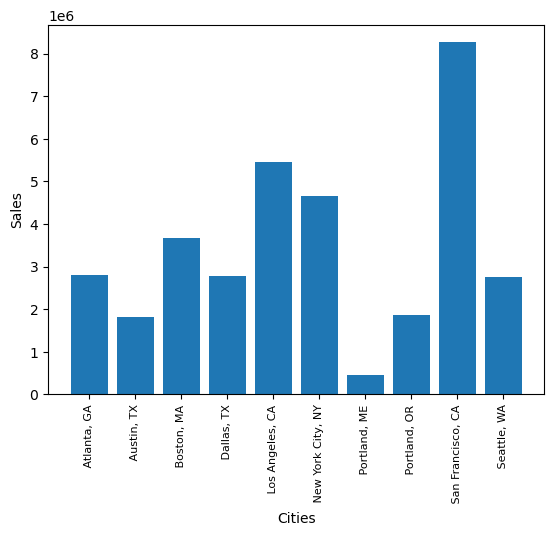

In [63]:
cities = city_sales_result.index
plt.bar(cities, city_sales_result['Sales'])
plt.xticks(cities,rotation='vertical', size=8)
plt.ylabel("Sales")
plt.xlabel("Cities")
plt.show()

#### What time should we display advertisements to maximize the likelihood of customer's buying product ?

In [80]:
#extract the hour and minute from the order date and keep of the count 

all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX",8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA",22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",9,27


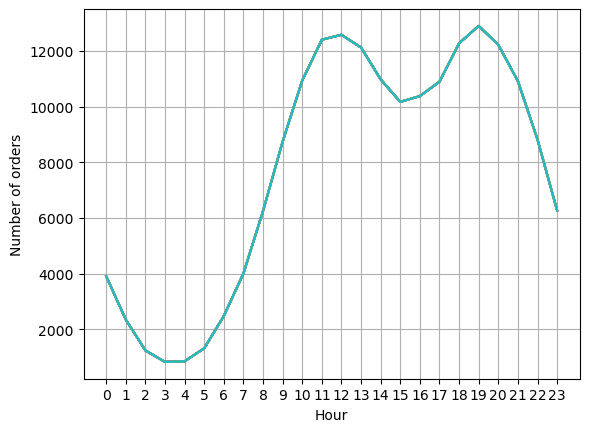

In [81]:
hours = range(0,24)
plt.plot(hours, all_data.groupby('Hour').count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of orders')
plt.grid()
plt.show()

#best time to display an advertisement for more customers to buy a product is : 10-11(am) and 6-7(pm)

#### What products are most often sold together ?

In [89]:
grouped_df = all_data[all_data['Order ID'].duplicated(keep=False)]
# grouped_df.head()
grouped_df['Grouped Products'] = grouped_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
grouped_df = grouped_df[['Order ID', 'Grouped Products']].drop_duplicates()
grouped_df.head()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_25040\3860455918.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_df['Grouped Products'] = grouped_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped Products
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [92]:
count = Counter()
for row in grouped_df['Grouped Products']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

for key, value in count.most_common():
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
('Lightning Charging Cable', 'Apple Airpods Headphones') 81
('Vareebadd Phone', 'Bose SoundSport Headphones') 80
('USB-C Charging Cable', 'Bose SoundSport Headphones') 77
('Apple Airpods Headphones', 'Wired Headphones') 69
('Lightning Charging Cable', 'USB-C Charging Cable') 58
('Lightning Charging Cable', 'AA Batteries (4-pack)') 55
('Lightning Charging Cable', 'Lightning Charging Cable') 54
('Bose SoundSport Headphones', 'Wired Headphones') 53
('AA Batteries (4-pack)', 'Lightning Charging Cable') 51
('AAA Batteries (4-pack)', 'USB-C Chargin

#### What product sold the most? Why do you think it sold the most?

C:\Users\KIIT\AppData\Local\Temp\ipykernel_25040\3289712273.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = product_group.sum()['Quantity Ordered']


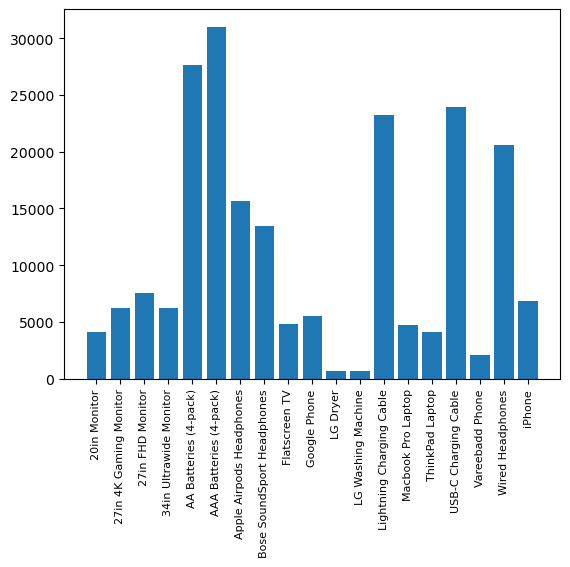

In [93]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_25040\136096346.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = all_data.groupby('Product').mean()['Price Each']
C:\Users\KIIT\AppData\Local\Temp\ipykernel_25040\136096346.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_25040\136096346.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


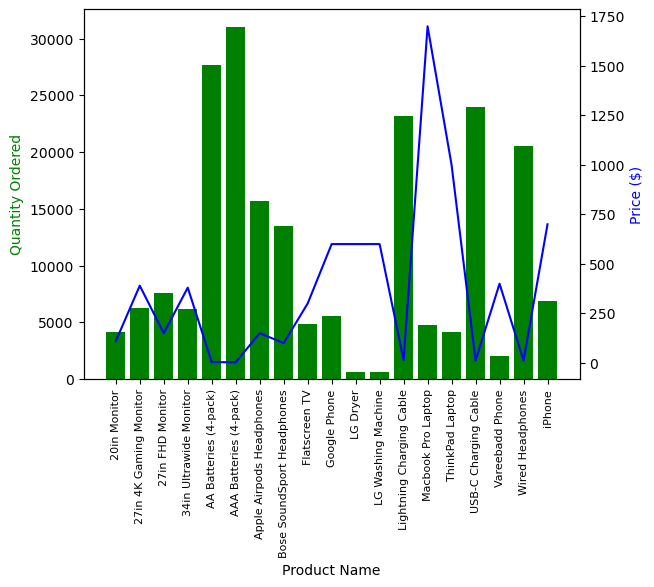

In [94]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()

#### Import all the dataframes into seperate csv files to create a report and dashboard

In [98]:
#updated all_data

all_data.to_csv("Updated_All_Data.csv", index=False)
month_sales_result.to_csv("Month_Sales_Count.csv", index=False)
city_sales_result.to_csv("City_Sales_Count.csv", index=False)
